<a href="https://colab.research.google.com/github/rakesh22230/Machine_Learning_Practise/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target)
print(f"\n{iris.target_names}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

['setosa' 'versicolor' 'virginica']


In [5]:
print(iris.data.shape)

(150, 4)


In [11]:
X = iris.data[:, :4]
y = iris.target
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test=train_test_split(X,y,test_size =0.30)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


Results for k=1:
Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  3 17]]

Classification Report:
[[13  0  0]
 [ 0 12  0]
 [ 0  3 17]]

------------------------------------------------------------
Results for k=2:
Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  3 17]]

Classification Report:
[[13  0  0]
 [ 0 12  0]
 [ 0  3 17]]

------------------------------------------------------------
Results for k=3:
Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  2 18]]

Classification Report:
[[13  0  0]
 [ 0 12  0]
 [ 0  2 18]]

------------------------------------------------------------
Results for k=4:
Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  4 16]]

Classification Report:
[[13  0  0]
 [ 0 12  0]
 [ 0  4 16]]

------------------------------------------------------------
Results for k=5:
Confusion Matrix:
[[13  0  0]
 [ 0 12  0]
 [ 0  2 18]]

Classification Report:
[[13  0  0]
 [ 0 12  0]
 [ 0  2 18]]

------------------------------------------------------------
Results for k=6:
Confusio

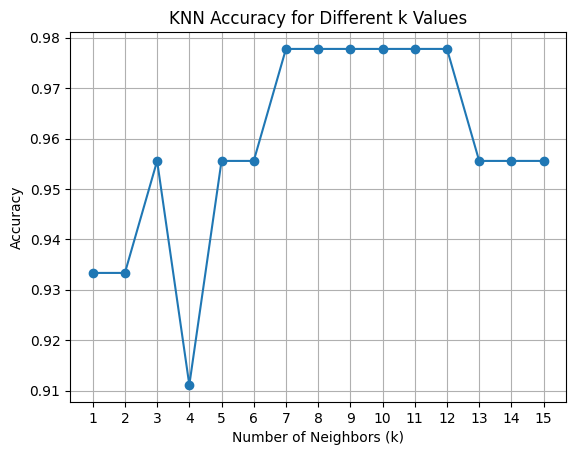

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

# Define range of k values
range_k = range(1, 16)
scores = {}
scores_list = []

# Iterate through k values from 1 to 15
for k in range_k:
    # Initialize the KNeighborsClassifier with k neighbors
    classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the model on the training data
    classifier.fit(X_train, y_train)

    # Predict the labels on the test data
    y_pred = classifier.predict(X_test)

    # Calculate the accuracy for the current value of k
    accuracy = metrics.accuracy_score(y_test, y_pred)
    scores[k] = accuracy
    scores_list.append(accuracy)

    # Compute confusion matrix and classification report
    result = metrics.confusion_matrix(y_test, y_pred)
    result1 = metrics.classification_report(y_test, y_pred)

    # Print results for each k
    print(f"Results for k={k}:")
    print("Confusion Matrix:")
    print(f"{result}\n")
    print("Classification Report:")
    print(f"{result}\n")
    print("-" * 60)

# Plot accuracy for different k values
plt.plot(range_k, scores_list, marker='o')
plt.title('KNN Accuracy for Different k Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range_k)
plt.grid(True)
plt.show()
